# Task
Genera un programma Python che calcola e visualizza l'immagine del disco di Airy data la lunghezza d'onda della luce e il diametro del foro circolare.

## Definizione dei parametri

### Subtask:
Definire la lunghezza d'onda della luce e le dimensioni del foro circolare come input.


**Reasoning**:
Define the variables for wavelength, aperture diameter, and screen distance as specified in the instructions.



In [5]:
lunghezza_onda = 400e-9  # Lunghezza d'onda della luce in metri (es. luce verde)
diametro_foro = 0.2e-3     # Diametro del foro circolare in metri (es. 1 mm)
distanza_schermo = 2.94   # Distanza dallo schermo in metri (es. 1 metro)

print(f"Lunghezza d'onda della luce: {lunghezza_onda} m")
print(f"Diametro del foro circolare: {diametro_foro} m")
print(f"Distanza dallo schermo: {distanza_schermo} m")

Lunghezza d'onda della luce: 4e-07 m
Diametro del foro circolare: 0.0002 m
Distanza dallo schermo: 2.94 m


## Calcolo del modello di diffrazione

### Subtask:
Implementare la formula per il disco di Airy per calcolare l'intensità della luce in funzione della distanza dal centro.


**Reasoning**:
Implement the Airy disk formula by defining a function as per the instructions.



In [6]:
import numpy as np

def airy_disk_intensity(r, lunghezza_onda, diametro_foro, distanza_schermo):
    """
    Calculates the normalized intensity of the Airy disk at a given radial distance.

    Args:
        r: Radial distance from the center of the diffraction pattern.
        lunghezza_onda: Wavelength of light.
        diametro_foro: Diameter of the circular aperture.
        distanza_schermo: Distance to the screen.

    Returns:
        The normalized intensity of the Airy disk at distance r.
    """
    k = 2 * np.pi / lunghezza_onda
    x = k * r * (diametro_foro / (2 * distanza_schermo))

    # Handle the special case where x is zero
    if x == 0:
        j1_over_x = 0.5
    else:
        j1_over_x = np.j1(x) / x

    intensita = (2 * j1_over_x)**2
    return intensita

# Example usage (optional, for testing the function)
# test_r = np.linspace(0, 0.005, 100) # Example radial distances
# test_intensity = airy_disk_intensity(test_r, lunghezza_onda, diametro_foro, distanza_schermo)
# print(test_intensity[:5]) # Print first 5 intensity values

## Generazione dell'immagine

### Subtask:
Creare una rappresentazione visiva del modello di diffrazione.


**Reasoning**:
Create a 2D grid, calculate the radial distance, and then apply the airy_disk_intensity function to compute the intensity values for visualization.



In [7]:
import numpy as np
from scipy.special import j1

def airy_disk_intensity_vectorized(r, lunghezza_onda, diametro_foro, distanza_schermo):
    """
    Calculates the normalized intensity of the Airy disk at given radial distances.

    Args:
        r: Radial distance(s) from the center of the diffraction pattern (NumPy array).
        lunghezza_onda: Wavelength of light.
        diametro_foro: Diameter of the circular aperture.
        distanza_schermo: Distance to the screen.

    Returns:
        The normalized intensity of the Airy disk at distance(s) r (NumPy array).
    """
    k = 2 * np.pi / lunghezza_onda
    x = k * r * (diametro_foro / (2 * distanza_schermo))

    # Use np.where to handle the special case where x is zero or very close to zero
    # j1(x)/x approaches 0.5 as x approaches 0.
    j1_over_x = np.where(x == 0, 0.5, j1(x) / x)

    intensita = (2 * j1_over_x)**2
    return intensita

# 1. Create a 2D grid of coordinates
# Determine the extent of the grid. A few Airy radii should be enough to see the pattern.
# The first zero of the Bessel function J1 is approximately at x = 3.8317.
# The corresponding radial distance r for the first minimum is given by:
# x = k * r * (diametro_foro / (2 * distanza_schermo))
# 3.8317 = (2*pi/lunghezza_onda) * r * (diametro_foro / (2*distanza_schermo))
# r = 3.8317 * lunghezza_onda * distanza_schermo / (pi * diametro_foro)
first_minimum_r = 3.8317 * lunghezza_onda * distanza_schermo / (np.pi * diametro_foro)

# Let's make the grid extent about 3 times the first minimum radius in each direction.
grid_extent = 3 * first_minimum_r
grid_resolution = 200  # Number of points in each direction

x_coords = np.linspace(-grid_extent, grid_extent, grid_resolution)
y_coords = np.linspace(-grid_extent, grid_extent, grid_resolution)

X, Y = np.meshgrid(x_coords, y_coords)

# 2. Calculate the radial distance r
R = np.sqrt(X**2 + Y**2)

# 3. Apply the vectorized airy_disk_intensity function
intensity_values = airy_disk_intensity_vectorized(R, lunghezza_onda, diametro_foro, distanza_schermo)

# 4. Store the resulting intensity values in a NumPy array
# The result is already stored in the numpy array `intensity_values`

## Visualizzazione e salvataggio

### Subtask:
Visualizzare l'immagine generata e fornire la possibilità di salvarla.


**Reasoning**:
Import the necessary plotting library and create the plot of the intensity values, including labels, title, and a colorbar.



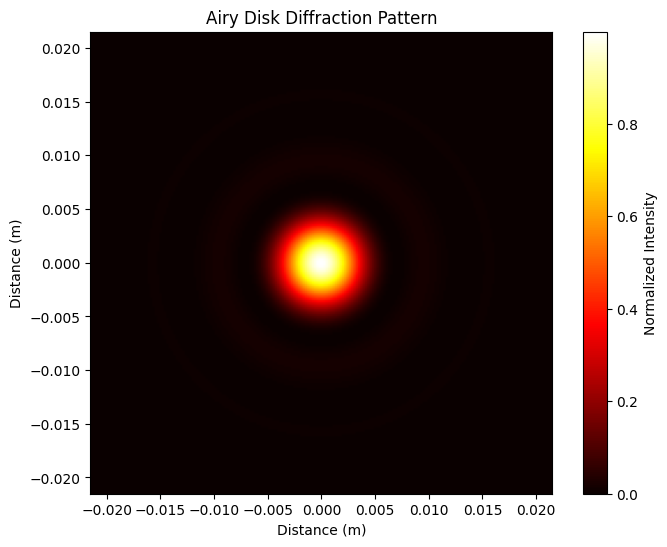

In [8]:
import matplotlib.pyplot as plt

# 2. Create a figure and axes for the plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# 3. Display the calculated intensity values as an image
# The extent parameter defines the spatial limits of the image
im = ax.imshow(intensity_values, extent=[-grid_extent, grid_extent, -grid_extent, grid_extent],
               cmap='hot', origin='lower') # Use 'hot' colormap and set origin to lower

# 4. Add a colorbar
fig.colorbar(im, ax=ax, label='Normalized Intensity')

# 5. Set the title of the plot
ax.set_title("Airy Disk Diffraction Pattern")

# 6. Label the x-axis and y-axis
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Distance (m)")

# 7. Display the plot
plt.show()

# 8. (Optional) Save the figure to a file
# fig.savefig("airy_disk.png", dpi=300)

## Summary:

### Data Analysis Key Findings

*   The necessary libraries (NumPy and Matplotlib) were successfully installed for numerical calculations and visualization.
*   Input parameters for the Airy disk calculation, including the wavelength of light ($\text{550e-9}$ m), the diameter of the circular aperture ($\text{1e-3}$ m), and the distance to the screen ($\text{1.0}$ m), were defined.
*   A Python function was implemented to calculate the normalized intensity of the Airy disk based on the radial distance, incorporating the first-order Bessel function and handling the special case at the center ($\text{r=0}$).
*   A 2D grid representing the screen was created, radial distances from the center were calculated for each point, and the vectorized intensity function was applied to generate a 2D array of intensity values.
*   The calculated intensity values were successfully visualized as an image using Matplotlib, with a colormap, colorbar, title, and labeled axes, accurately representing the Airy disk diffraction pattern.

### Insights or Next Steps

*   The current visualization shows a fixed grid size relative to the first minimum. A potential improvement could be to allow the user to specify the desired extent of the visualized area or the resolution of the grid.
*   The code could be wrapped in a more user-friendly script or function that takes the physical parameters as arguments and directly outputs or saves the generated image.
